In [2]:
import pandas as pd

df_discursos = pd.read_excel("data/falando_nela_1.xlsx", sheet_name="Discursos")
df_discursos_analises = pd.read_excel("data/falando_nela_1.xlsx", sheet_name="DiscursosAnalises")

In [3]:
df_merged = pd.merge(df_discursos, df_discursos_analises, on="CodigoPronunciamento")


### Distribuição da coluna BM25_Constituição ###

Quartis:
0.25    1.267891
0.50    1.755870
0.75    2.279236
Name: BM25_Constituição, dtype: float64
Mediana: 1.755869720580159


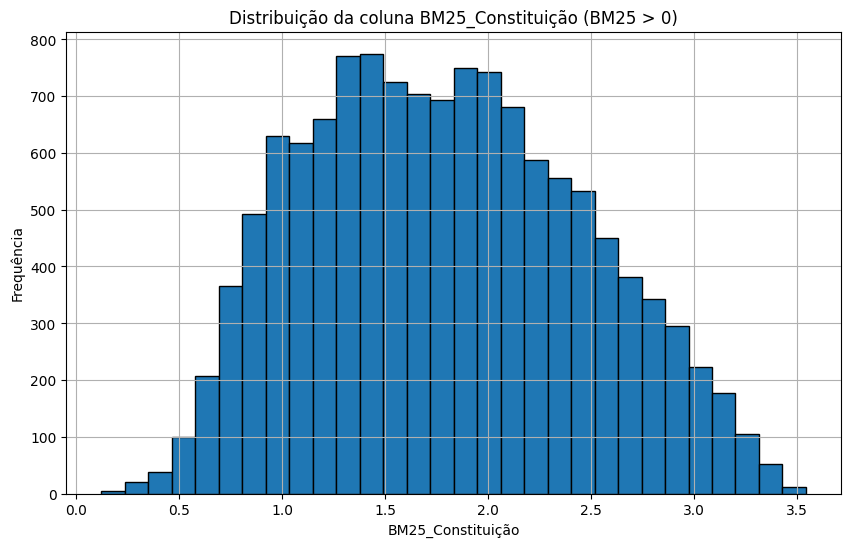

In [4]:
# Filtrar linhas com BM25_Constituição > 0
df_filtrado = df_merged[df_merged['BM25_Constituição'] > 0]

# Calcular quartis e mediana com base no filtro
quartis = df_filtrado['BM25_Constituição'].quantile([0.25, 0.5, 0.75])
mediana = df_filtrado['BM25_Constituição'].median()

print(f"Quartis:\n{quartis}")
print(f"Mediana: {mediana}")

# Plotar a distribuição filtrada
plt.figure(figsize=(10, 6))
df_filtrado['BM25_Constituição'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribuição da coluna BM25_Constituição (BM25 > 0)')
plt.xlabel('BM25_Constituição')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

### Histograma ###

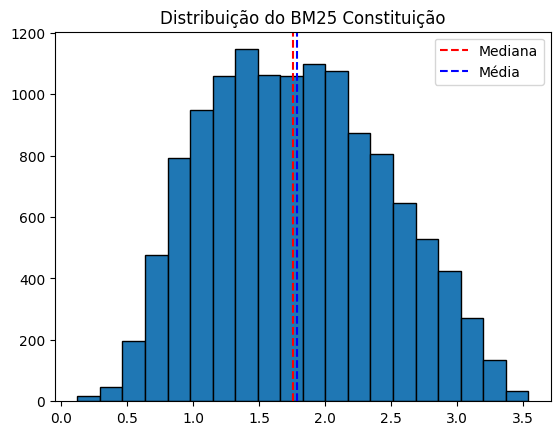

In [5]:
import matplotlib.pyplot as plt

plt.hist(df_filtrado['BM25_Constituição'], bins=20, edgecolor='black')
plt.axvline(df_filtrado['BM25_Constituição'].median(), color='red', linestyle='dashed', label='Mediana')
plt.axvline(df_filtrado['BM25_Constituição'].mean(), color='blue', linestyle='dashed', label='Média')
plt.legend()
plt.title('Distribuição do BM25 Constituição')
plt.show()


### BM25: exemplos ###

In [18]:
# Discurso com BM25 mais alto
discurso_bm25_alto = df_filtrado.loc[df_filtrado['BM25_Constituição'].idxmax()]['TextoIntegral']

# Quartis
quartis = df_filtrado['BM25_Constituição'].quantile([0.25, 0.5, 0.75])

# Selecionar um discurso aleatório para cada quartil
discurso_quartil_1 = df_filtrado[df_filtrado['BM25_Constituição'] <= quartis[0.25]].sample(1)['TextoIntegral'].values[0]
discurso_quartil_2 = df_filtrado[(df_filtrado['BM25_Constituição'] > quartis[0.25]) & (df_filtrado['BM25_Constituição'] <= quartis[0.5])].sample(1)['TextoIntegral'].values[0]
discurso_quartil_3 = df_filtrado[(df_filtrado['BM25_Constituição'] > quartis[0.5]) & (df_filtrado['BM25_Constituição'] <= quartis[0.75])].sample(1)['TextoIntegral'].values[0]
discurso_quartil_4 = df_filtrado[df_filtrado['BM25_Constituição'] > quartis[0.75]].sample(1)['TextoIntegral'].values[0]

from IPython.display import display, HTML

# Função para destacar "Constituição" com fundo amarelo
def highlight_constitution(text):
    return text.replace("Constituição", '<span style="background-color: yellow; padding: 2px; border-radius: 3px;">Constituição</span>')

# Aplicar o destaque nos discursos
discurso_bm25_alto = highlight_constitution(discurso_bm25_alto)
discurso_quartil_1 = highlight_constitution(discurso_quartil_1)
discurso_quartil_2 = highlight_constitution(discurso_quartil_2)
discurso_quartil_3 = highlight_constitution(discurso_quartil_3)
discurso_quartil_4 = highlight_constitution(discurso_quartil_4)

# Exibir os discursos com destaque usando HTML
display(HTML(f"<h3>Discurso com BM25 mais alto:</h3><p>{discurso_bm25_alto}</p>"))
display(HTML(f"<h3>Discurso aleatório do 1º quartil:</h3><p>{discurso_quartil_1}</p>"))
display(HTML(f"<h3>Discurso aleatório do 2º quartil:</h3><p>{discurso_quartil_2}</p>"))
display(HTML(f"<h3>Discurso aleatório do 3º quartil:</h3><p>{discurso_quartil_3}</p>"))
display(HTML(f"<h3>Discurso aleatório do 4º quartil:</h3><p>{discurso_quartil_4}</p>"))


### Distribuição ao longo do período estudado: média móvel trimestral ###


/var/folders/2k/hh_m8b1d5mn22m0sk7d_zncc0000gn/T/ipykernel_73277/2657289948.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Trimestre'] = df_filtrado['DataPronunciamento'].dt.to_period('Q')


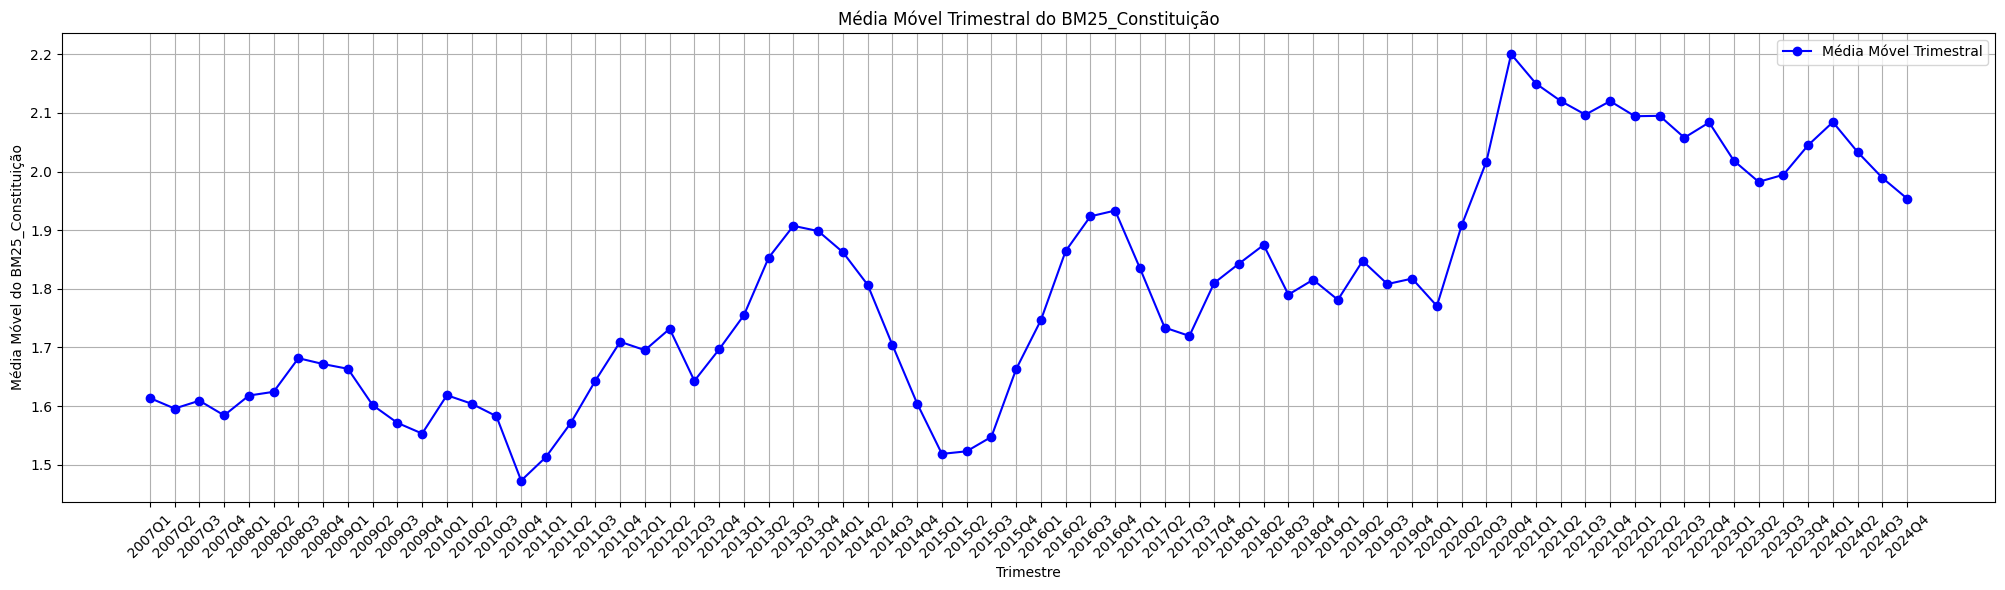

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Converter a coluna de data para datetime
df_merged['DataPronunciamento'] = pd.to_datetime(df_merged['DataPronunciamento'])

# Filtrar linhas com BM25_Constituição > 0
df_filtrado = df_merged[df_merged['BM25_Constituição'] > 0]

# Criar coluna de trimestre
df_filtrado['Trimestre'] = df_filtrado['DataPronunciamento'].dt.to_period('Q')

# Agrupar por trimestre e calcular a média
media_trimestral = df_filtrado.groupby('Trimestre')['BM25_Constituição'].mean().reset_index()

# Ordenar os trimestres corretamente
media_trimestral = media_trimestral.sort_values(by='Trimestre')

# Criar a Média Móvel Trimestral com janela deslizante de 3 trimestres
media_trimestral['Média_Móvel_Trimestral'] = media_trimestral['BM25_Constituição'].rolling(window=3, min_periods=1).mean()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(media_trimestral['Trimestre'].astype(str), media_trimestral['Média_Móvel_Trimestral'], marker='o', label="Média Móvel Trimestral", color='blue')
plt.title('Média Móvel Trimestral do BM25_Constituição')
plt.xlabel('Trimestre')
plt.ylabel('Média Móvel do BM25_Constituição')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.subplots_adjust(right=2)

plt.show()


### Distribuição ao longo do período estudado: mediana, por trimestre ###


/var/folders/2k/hh_m8b1d5mn22m0sk7d_zncc0000gn/T/ipykernel_73277/3423394370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Trimestre'] = df_filtrado['DataPronunciamento'].dt.to_period('Q')


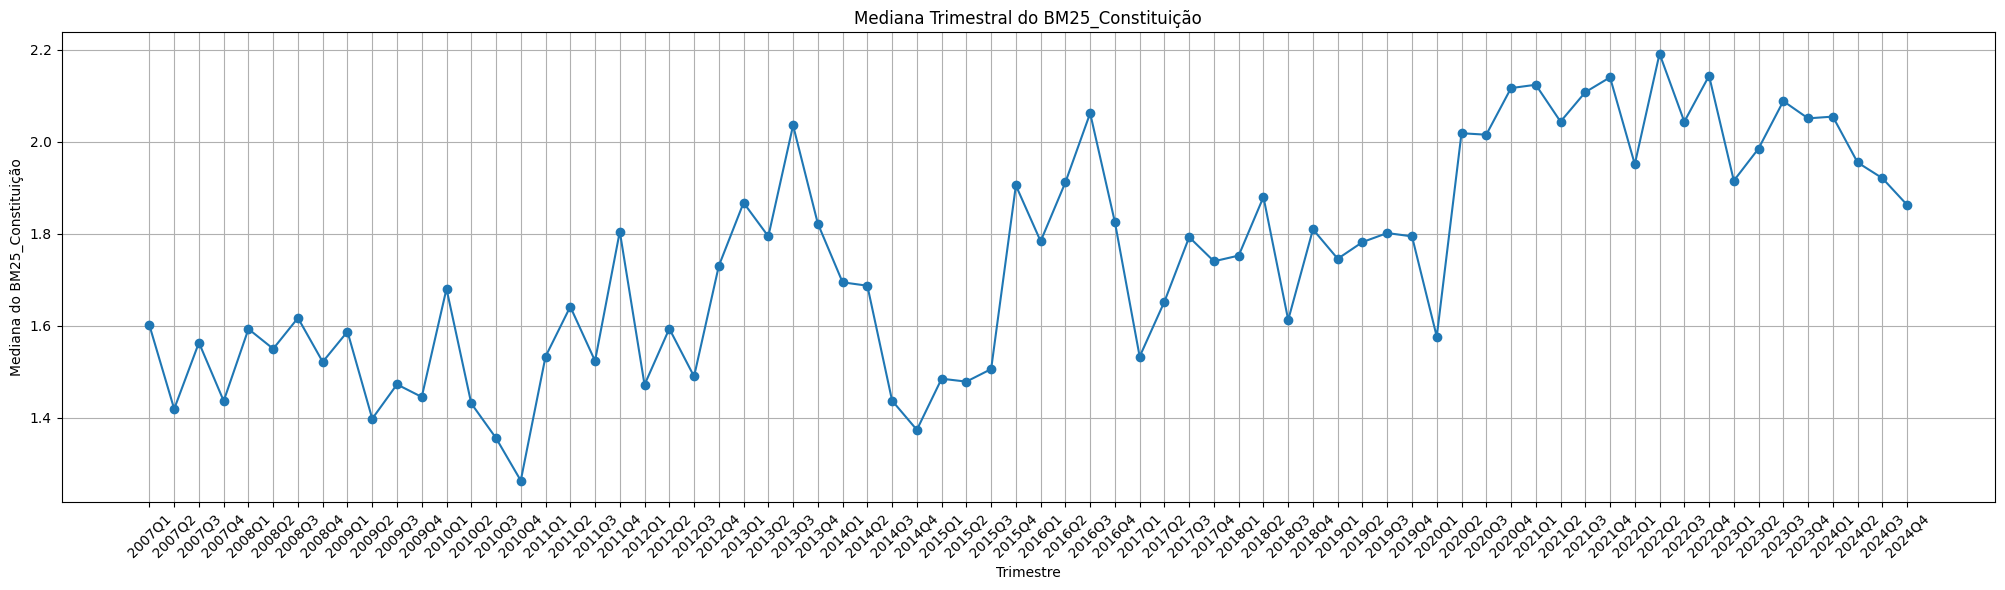

In [9]:
# Converter a coluna de data para datetime
df_merged['DataPronunciamento'] = pd.to_datetime(df_merged['DataPronunciamento'])

# Filtrar linhas com BM25_Constituição > 0
df_filtrado = df_merged[df_merged['BM25_Constituição'] > 0]

# Agrupar por trimestre e calcular a mediana
df_filtrado['Trimestre'] = df_filtrado['DataPronunciamento'].dt.to_period('Q')
mediana_trimestral = df_filtrado.groupby('Trimestre')['BM25_Constituição'].median().reset_index()

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(mediana_trimestral['Trimestre'].astype(str), mediana_trimestral['BM25_Constituição'], marker='o', label="Mediana  Trimestral")
plt.title('Mediana Trimestral do BM25_Constituição')
plt.xlabel('Trimestre')
plt.ylabel('Mediana do BM25_Constituição')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.subplots_adjust(right=2)

plt.show()

###  ###